In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# that way you can import the helper_functions
sys.path.append(os.path.abspath("../"))

sys.path;

In [3]:
from helper_functions import *

In [4]:
train_df = pd.read_csv("../input/train.csv")

In [5]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
train_df.target.value_counts(dropna=False)

0    1225312
1      80810
Name: target, dtype: int64

In [7]:
train_df.loc[train_df['target'] == 1, 'question_text'].tolist()[:5]

['Has the United States become the largest dictatorship in the world?',
 'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
 "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
 'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
 'Which races have the smallest penis?']

# Sampling
---

### Upsampling

In [ ]:
train_upsampled = upsampling(train_df[train_df.target==0], 
                             train_df[train_df.target==1])
train_upsampled['target'].value_counts()

### Downsampling

In [8]:
train_downsampled = downsampling(train_df[train_df.target==0], 
                                 train_df[train_df.target==1])
train_downsampled['target'].value_counts()

1    80810
0    80810
Name: target, dtype: int64

# Cleaning raw text
---

In [9]:
from string import punctuation
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


def clean_raw_data(text):
    clean_text = nltk.word_tokenize(text)
    
    tokens = [token for token in clean_text 
              if token not in stop_words and token not in punctuation]
    return tokens

# Tokenizetion and creating new feature - tokens_len
---

In [10]:
import nltk

train_downsampled['tokens'] = train_downsampled['question_text'].apply(clean_raw_data)

train_downsampled['tokens_len'] = train_downsampled['tokens'].apply(len)

In [11]:
train_downsampled.loc[train_downsampled['tokens_len'] > 10, 'target'].value_counts()

1    34065
0    14571
Name: target, dtype: int64

In [12]:
print("There are {} documents with over 40 words.".format(sum(train_downsampled['tokens_len'] > 40)))

There are 10 documents with over 40 words.


c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


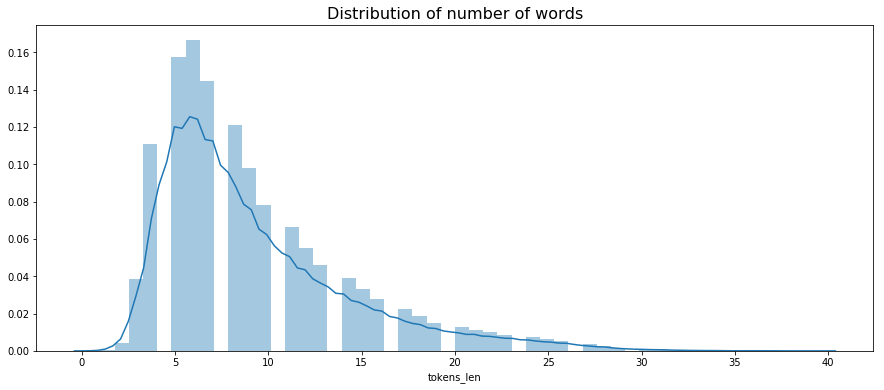

In [13]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(train_downsampled.loc[train_downsampled['tokens_len'] < 40, 'tokens_len'], ax=ax);

In [14]:
train_downsampled.loc[train_downsampled['tokens_len'] < 2, 'target'].value_counts()

1    26
0     3
Name: target, dtype: int64

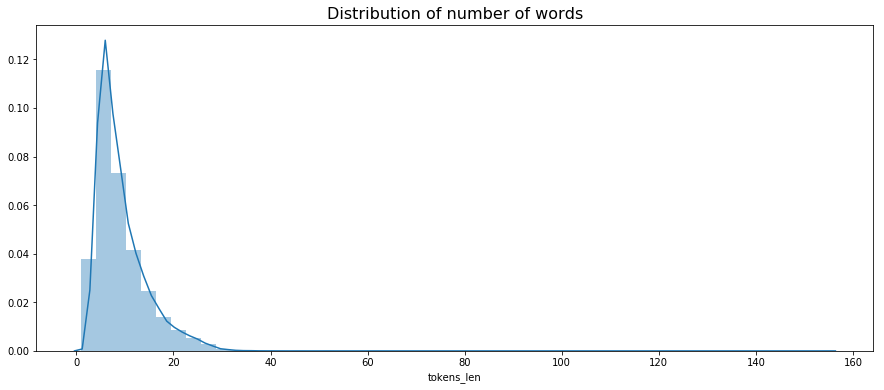

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(train_downsampled['tokens_len'], bins=50, ax=ax);

# Generate new feature number of question sentances in the text
---

In [16]:
from collections import Counter

def find_number_of_type_of_sents(text):
    doc = nltk.sent_tokenize(text)
    return dict(Counter(map(lambda x: x[-1], doc)))

unique_sents = train_downsampled['question_text'].apply(find_number_of_type_of_sents)

train_downsampled['number_of_questions_in_text'] = [tok.get('?', 0) for tok in unique_sents.tolist()]

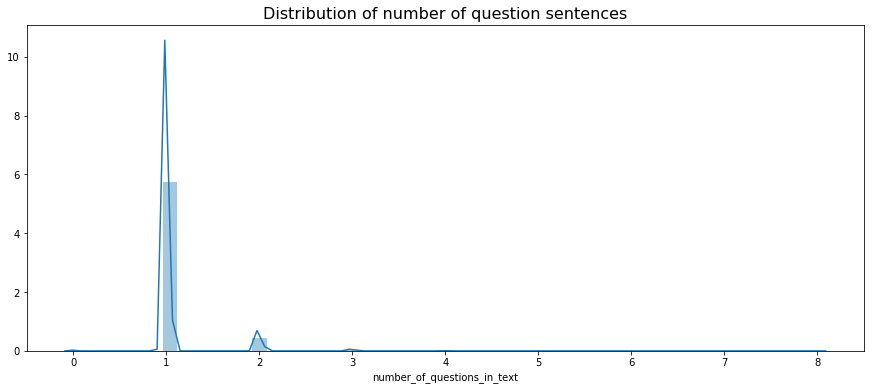

In [17]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of question sentences", fontsize=16)
ax.set_xlabel("number of question sentences")
sns.distplot(train_downsampled['number_of_questions_in_text'].fillna(-1), ax=ax);

In [18]:
train_downsampled['number_of_questions_in_text'].value_counts(dropna=False)

1    148180
2     11714
3      1215
0       313
4       165
5        26
6         5
8         1
7         1
Name: number_of_questions_in_text, dtype: int64

In [19]:
train_downsampled.groupby(['number_of_questions_in_text', 'target']).size()

number_of_questions_in_text  target
0                            0            39
                             1           274
1                            0         76934
                             1         71246
2                            0          3497
                             1          8217
3                            0           293
                             1           922
4                            0            39
                             1           126
5                            0             6
                             1            20
6                            0             2
                             1             3
7                            1             1
8                            1             1
dtype: int64

## Adjusting the data 
---

In [20]:
train_downsampled['clean_text'] = train_downsampled['tokens'].apply(' '.join)

In [21]:
train_downsampled.head(5)

,qid,question_text,target,tokens,tokens_len,number_of_questions_in_text,clean_text
824538,a1949c2d0f0f2b18c1da,How many songs did Prince have after his death?,0,"[How, many, songs, Prince, death]",5,1,How many songs Prince death
296257,3a0157c5f548756a3362,Where can I obtain edible seaweed that tastes ...,0,"[Where, I, obtain, edible, seaweed, tastes, li...",8,1,Where I obtain edible seaweed tastes like bacon
29904,05d88600609f7a40a7eb,What is full form of etc?,0,"[What, full, form, etc]",4,1,What full form etc
1136592,dec083b228b5b3c8cdfc,How is c-dac Noida for PG-BDA course?,0,"[How, c-dac, Noida, PG-BDA, course]",5,1,How c-dac Noida PG-BDA course
207098,287fd4fa869108f499fa,What is scope of doing Part time M.tech From V...,0,"[What, scope, Part, time, M.tech, From, VJTI, ...",8,1,What scope Part time M.tech From VJTI Mumbai


# Trying different models
---

## Using SGDClassifier

In [22]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nb', SGDClassifier(loss='perceptron', max_iter=100, random_state=42)),
])


F1 score:  0.8246475195822455
Normalized confusion matrix


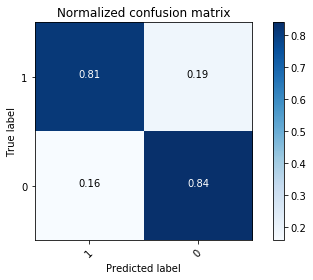

In [23]:
export_path = os.path.abspath("../models/sgdclassifier_basic.pickle")

model_sgd = train_model(pipeline_sgd, train_downsampled, 
                          input_cols='clean_text', export_path=export_path)

In [25]:
from helper_functions.custom_transformers import FactorExctractor

# with two more features 'tokens_len', 'number_of_questions_in_text'

pipeline_sgd_adv = Pipeline([
    ('union', FeatureUnion(
        transformer_list  = [
            ('numeric_features', Pipeline([
                ('selector', FactorExctractor(['tokens_len', 'number_of_questions_in_text']))
            ])),
            ('text_features', Pipeline([
                ('selector', FactorExctractor('clean_text')),
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
        ]))
        ]
    )),
    ('nb', SGDClassifier(loss='perceptron', max_iter=100, random_state=42)),
])

F1 score:  0.8819725307438051
Normalized confusion matrix


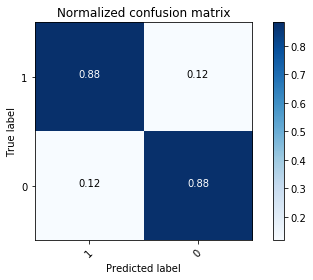

In [26]:
export_path = os.path.abspath("../models/sgdclassifier_adv.pickle")

model_sgd_adv = train_model(pipeline_sgd_adv, train_downsampled,
                        input_cols=['clean_text', 'tokens_len', 'number_of_questions_in_text'],
                        export_path=export_path)

## Using Linear SVClassifier


In [27]:
from sklearn.svm import LinearSVC

pipeline_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lsvc', LinearSVC()),
])

F1 score:  0.8807640957173667
Normalized confusion matrix


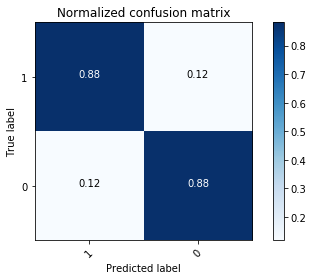

In [28]:
export_path = os.path.abspath("../models/linearSVC_basic.pickle")

model_svm = train_model(pipeline_svm, train_downsampled,
                        input_cols='clean_text', export_path=export_path)

In [29]:
# with two more features 'tokens_len', 'number_of_questions_in_text'

pipeline_svm_adv = Pipeline([
    ('union', FeatureUnion(
        transformer_list  = [
            ('numeric_features', Pipeline([
                ('selector', FactorExctractor(['tokens_len', 'number_of_questions_in_text']))
            ])),
            ('text_features', Pipeline([
                ('selector', FactorExctractor('clean_text')),
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
        ]))
        ]
    )),
    ('lsvc', LinearSVC()),
])

c:\program files (x86)\python37-32\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 score:  0.8779275044395697
Normalized confusion matrix


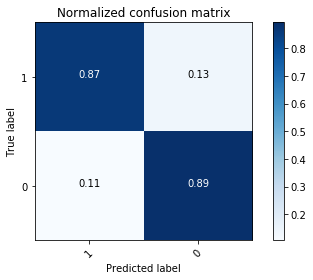

In [30]:
export_path = os.path.abspath("../models/linearSVC_adv.pickle")

model_svm_adv = train_model(pipeline_svm_adv, train_downsampled,
                            input_cols=['clean_text', 'tokens_len', 'number_of_questions_in_text'],
                            export_path=export_path)

## Using LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

pipeline_log_reg = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('log_reg', LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')),
])

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


F1 score:  0.8822778029585067
Normalized confusion matrix


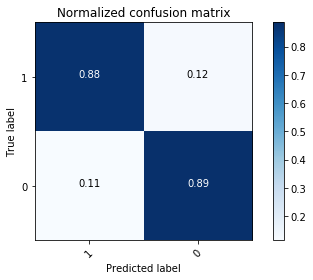

In [32]:
export_path = os.path.abspath("../models/logisticregression_basic.pickle")

model_log_reg = train_model(pipeline_log_reg, train_downsampled, 
                            input_cols='clean_text', export_path=export_path)

In [33]:
pipeline_log_reg_adv = Pipeline([
    ('union', FeatureUnion(
        transformer_list  = [
            ('numeric_features', Pipeline([
                ('selector', FactorExctractor(['tokens_len', 'number_of_questions_in_text']))
            ])),
            ('text_features', Pipeline([
                ('selector', FactorExctractor('clean_text')),
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
        ]))
        ]
    )),
    ('log_reg', LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')),
])

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


F1 score:  0.8775231634679022
Normalized confusion matrix


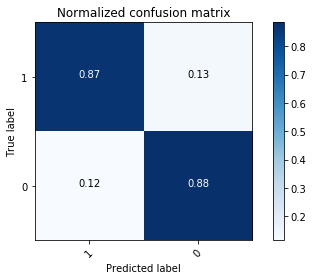

In [34]:
export_path = os.path.abspath("../models/logisticregression_adv.pickle")

model_log_reg_adv = train_model(pipeline_log_reg_adv, train_downsampled,
                                input_cols=['clean_text', 'tokens_len', 'number_of_questions_in_text'],
                                export_path=export_path)

## Using DecisionTreeClassifier


In [35]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dtree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('dtree', DecisionTreeClassifier(max_depth=30)),
])

F1 score:  0.7628071590170911
Normalized confusion matrix


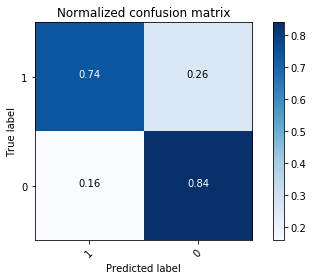

In [36]:
export_path = os.path.abspath("../models/decisiontree_basic.pickle")

model_tree = train_model(pipeline_dtree, train_downsampled,
                         input_cols='clean_text', export_path=export_path)

In [37]:
pipeline_dtree_adv = Pipeline([
    ('union', FeatureUnion(
        transformer_list  = [
            ('numeric_features', Pipeline([
                ('selector', FactorExctractor(['tokens_len', 'number_of_questions_in_text']))
            ])),
            ('text_features', Pipeline([
                ('selector', FactorExctractor('clean_text')),
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
        ]))
        ]
    )),
   ('dtree', DecisionTreeClassifier(max_depth=30))
])

F1 score:  0.7801556832884383
Normalized confusion matrix


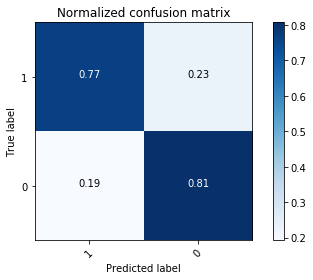

In [38]:
export_path = os.path.abspath("../models/decisiontree_adv.pickle")

model_tree_adv = train_model(pipeline_dtree_adv, train_downsampled,
                             input_cols=['clean_text', 'tokens_len', 'number_of_questions_in_text'],
                             export_path=export_path)

---

In [31]:
train_downsampled['tokens'] = train_downsampled.apply(lambda x: x['tokenized'].split(' '), axis=1)

In [32]:
train_downsampled.head()

,qid,question_text,target,tokenized,tokens
824538,a1949c2d0f0f2b18c1da,How many songs did Prince have after his death?,0,How many songs Prince death,"[How, many, songs, Prince, death]"
296257,3a0157c5f548756a3362,Where can I obtain edible seaweed that tastes ...,0,Where I obtain edible seaweed tastes like bacon,"[Where, I, obtain, edible, seaweed, tastes, li..."
29904,05d88600609f7a40a7eb,What is full form of etc?,0,What full form etc,"[What, full, form, etc]"
1136592,dec083b228b5b3c8cdfc,How is c-dac Noida for PG-BDA course?,0,How c-dac Noida PG-BDA course,"[How, c-dac, Noida, PG-BDA, course]"
207098,287fd4fa869108f499fa,What is scope of doing Part time M.tech From V...,0,What scope Part time M.tech From VJTI Mumbai,"[What, scope, Part, time, M.tech, From, VJTI, ..."


In [34]:
from gensim.models import Word2Vec

In [35]:
w2v_model = Word2Vec(train_downsampled['tokens'].tolist(), size=100, window=5, min_count=5, workers=4)

In [37]:
w2v_model.train(train_downsampled['tokens'].tolist(), total_examples=train_downsampled.shape[0], epochs=10)

(12396429, 14957630)

In [38]:
w2v_model.build_vocab_from_freq

<bound method BaseWordEmbeddingsModel.build_vocab_from_freq of <gensim.models.word2vec.Word2Vec object at 0x2E3C8590>>

---

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter

class PosTagMatrix(BaseEstimator, TransformerMixin):
    #normalise = True - devide all values by a total number of tags in the sentence
    #tokenizer - take a custom tokenizer function
    def __init__(self, tokenizer=lambda x: x.split(), normalize=True):
        self.tokenizer=tokenizer
        self.normalize=normalize

    #helper function to tokenize and count parts of speech
    def pos_func(self, sentence):
        import nltk
        return Counter(tag for word,tag in nltk.pos_tag(self.tokenizer(sentence)))

    # fit() doesn't do anything, this is a transformer class
    def fit(self, X, y = None):
        return self

    #all the work is done here
    def transform(self, X):
        X_tagged = X.apply(self.pos_func).apply(pd.Series).fillna(0)
        X_tagged['n_tokens'] = X_tagged.apply(sum, axis=1)
        if self.normalize:
            X_tagged = X_tagged.divide(X_tagged['n_tokens'], axis=0)

        return X_tagged

In [32]:
import nltk

k = PosTagMatrix(nltk.word_tokenize)

k.transform(train_df['question_text'])

KeyboardInterrupt: 

In [40]:
k.transform(train_df.loc[0:1000, 'question_text'])

,WRB,VBD,NNP,NNS,VBP,PRP$,NN,IN,DT,CD,...,JJR,``,'',POS,$,RBS,PDT,FW,:,n_tokens
0,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,0.071429,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
1,0.055556,0.000000,0.000000,0.055556,0.055556,0.000000,0.055556,0.000000,0.055556,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
2,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.416667,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
3,0.100000,0.200000,0.400000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
4,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.187500,0.062500,0.125000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
5,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
6,0.100000,0.000000,0.050000,0.100000,0.050000,0.000000,0.000000,0.050000,0.050000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
7,0.000000,0.000000,0.000000,0.125000,0.187500,0.062500,0.000000,0.062500,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
8,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.190476,0.047619,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
9,0.021277,0.063830,0.000000,0.063830,0.021277,0.042553,0.106383,0.042553,0.042553,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0


In [37]:
train_df.loc[0:10, 'question_text']

0     How did Quebec nationalists see their province...
1     Do you have an adopted dog, how would you enco...
2     Why does velocity affect time? Does velocity a...
3     How did Otto von Guericke used the Magdeburg h...
4     Can I convert montra helicon D to a mountain b...
5     Is Gaza slowly becoming Auschwitz, Dachau or T...
6     Why does Quora automatically ban conservative ...
7     Is it crazy if I wash or wipe my groceries off...
8     Is there such a thing as dressing moderately, ...
9     Is it just me or have you ever been in this ph...
10                     What can you say about feminism?
Name: question_text, dtype: object

In [98]:
train_downsampled = downsampling(train_df[train_df['target'] == 0], train_df[train_df['target'] == 1])

In [48]:
import spacy

In [49]:
nlp = spacy.load('en_core_web_sm')

In [89]:
def processing(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not (token.is_stop or token.is_punct)])

In [101]:
train_downsampled['filtered_df'] = train_downsampled.apply(lambda x: processing(x['question_text']), axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(train_downsampled['filtered_df'], 
                                                    train_downsampled['target'], random_state = 0)

model_clean = pipeline_sgd.fit(X_train, y_train)
y_predict = model_clean.predict(X_test)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [103]:
f1_score(y_test, y_predict)

0.8720462790469653

# Spacy
---

In [ ]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [70]:
doc = nlp('Has the United States become the largest dictatorship in the world?')

In [74]:
[token for token in doc if not (token.is_punct or token.is_stop)]

[Has, United, States, largest, dictatorship, world]

In [75]:
doc

Has the United States become the largest dictatorship in the world?

In [77]:
long_doc = nlp('I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?')

In [79]:
list(long_doc.sents)

[I am gay boy and I love my cousin (boy).,
 He is sexy, but I dont know what to do.,
 He is hot, and I want to see his di**. What should I do?]

In [85]:
[token for token in long_doc if not (token.is_punct or token.is_stop)]

[I,
 gay,
 boy,
 I,
 love,
 cousin,
 boy,
 He,
 sexy,
 I,
 nt,
 know,
 He,
 hot,
 I,
 want,
 di**.,
 What,
 I]